In [69]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.optimize as opt

# Problem 1

In [70]:
def minfind_GS(equation, a, c, tol):
    '''
    This function accepts a defined function, and floats a, c , and tol as input. The output is an array
    of r0 values, called r0_array. First, the ratio phi is established, along with a bracket a-c, and a 
    "midpoint" b as a function of a, c and phi. Then, a loop is executed that either narrows the bracket
    down or narrows the bracket and "flips" it as the algorithm requires, so long as within tolerance.
    At the end of action branch the guess x value is appended to the r0 array.
    '''
    r0_array = []
    
    phi = (3 - np.sqrt(5))/2
    b = a + phi * (c - a)

    while np.abs(a - c) > tol:
        x = c - phi * (c - a)
        if equation(x) < equation(b):
            a = b;
            b = x;
            c = c;
            r0_array.append(b)
        else:
            c = a;
            a = x;
            b = b;
            r0_array.append(a)
    
    return r0_array

# Problem 2

In [71]:
def E(r0):
    '''
    This is the least squares formula with our velocity curve function embedded in. It is a function of
    r0, and depends on v_obs, v_inf, and r_obs, which are part of the velocity function.
    '''

    return np.sum((v_obs - (v_inf * (1 - np.exp( -r_obs / r0))))**2)

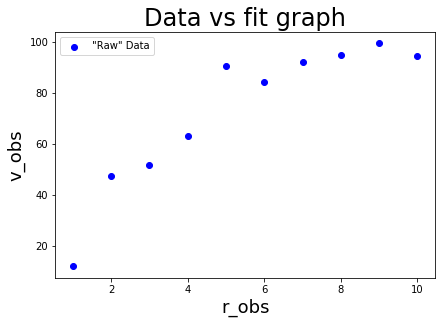

In [72]:
# declared all my variables and loaded in data, plotted said data
v_inf = 100
tol = 1e-8
a = 1
c = 10
data = pd.read_csv('./rot.csv')
r_obs = data['r']
v_obs = data['v']
    
fig,ax = plt.subplots(1)
fig.tight_layout()
ax.scatter(r_obs, v_obs,
      color = 'b',
      marker = 'o',
      linestyle = 'None',
      label = '"Raw" Data')

ax.set_xlabel('r_obs', fontsize=18)
ax.set_ylabel('v_obs', fontsize=18)
ax.set_title('Data vs fit graph', fontsize=24)
ax.legend(loc=0);

3.330378102684603


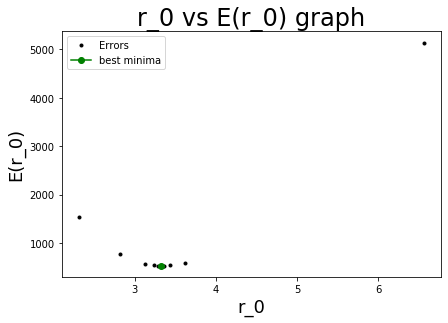

In [73]:
# implement Golden Search, plot the Error function stuff
optimal_r0 = minfind_GS(E, a, c, tol)
E_r0 = []
for r in optimal_r0:
    opt_r = E(r)
    E_r0.append(opt_r)

print(optimal_r0[-1])
fig,ax = plt.subplots(1)
fig.tight_layout()


ax.plot(optimal_r0, E_r0, 
        marker = '.',
        color = 'k',
        linestyle= 'None',
        label = "Errors")
ax.plot(optimal_r0[-1], E_r0[-1],
        marker = 'o',
        color = 'g',
       label = 'best minima')

ax.set_xlabel('r_0', fontsize=18)
ax.set_ylabel('E(r_0)', fontsize=18)
ax.set_title('r_0 vs E(r_0) graph', fontsize=24)
ax.legend(loc=0);

# Problem 3

In [74]:
def Eboi(x):
    '''
    Eboi is a function that takes in x, a np.array() with v_inf and r0 guesses in that order. It breaks
    the array into two, gets all the variables that E(r0) needed to work, and calls it. This function is
    needed for Powell's method to work so it can simultaneously establish an optimal v_inf and r0. Output
    is E evaluated at all the variables we set up.
    '''
    v_inf = x[0]
    r0 = x[1]
    data = pd.read_csv('./rot.csv')
    r_obs = data['r']
    v_obs = data['v']
    E = np.sum((v_obs - (v_inf * (1 - np.exp( -r_obs / r0))))**2)
    return E

In [75]:
x = np.array([100, 3])

In [76]:
opt.minimize(Eboi, x, method='Powell')

   direc: array([[0.        , 1.        ],
       [9.63427009, 0.70680212]])
     fun: 425.87989690417186
 message: 'Optimization terminated successfully.'
    nfev: 94
     nit: 4
  status: 0
 success: True
       x: array([110.77932243,   4.1642636 ])

In [77]:
one_1 = ((4.1642636 - 3.330378102684603) / 3.330378102684603) * 100
one_2 = ((4.1642636 - 3) / 3) * 100
two = ((110.77932243 - 100) / 100) * 100
print(one_1, one_2, two)

25.038763515866425 38.80878666666667 10.779322429999993


Funny enough, when v_inf is relaxed, it is quite off in both v_inf and r0, versus my minimizer with v_inf set at 100. Golden search method minimized the r0 to 3.33, versus the Powell's 4.16. The v_inf is 10% off, and r0 is 25% off relative to my 3.33 value, and 38% relative to the actual value of 3. Not too bad, but not excellent? What is the "goodness" benchmark for this kind of stuff?